# Extract Sub-Images

In [1]:
frames = {}
with open("./vehicle-tracking/runs/track/exp/tracks/video-1-raw.txt", 'r') as f:
    for line in f:
        print(line)
        f, id, x, y, w, h = line.split()[0:6]
        if f not in frames.keys():
            frames[int(f)] = []
        frames[int(f)].append([id, int(x), int(y), int(w), int(h)])

3 1 588 553 43 37 -1 -1 -1 0 

4 1 589 553 42 37 -1 -1 -1 0 

5 1 588 553 42 38 -1 -1 -1 0 

6 1 585 554 44 39 -1 -1 -1 0 

7 1 584 554 44 40 -1 -1 -1 0 

8 1 584 553 45 42 -1 -1 -1 0 

9 1 584 554 44 41 -1 -1 -1 0 

10 1 582 553 47 44 -1 -1 -1 0 

11 1 581 552 49 46 -1 -1 -1 0 

12 1 581 553 49 45 -1 -1 -1 0 

13 1 582 554 46 44 -1 -1 -1 0 

14 1 583 554 45 45 -1 -1 -1 0 

15 1 581 554 46 45 -1 -1 -1 0 

16 1 580 553 48 47 -1 -1 -1 0 

17 1 581 554 47 47 -1 -1 -1 0 

18 1 580 554 48 47 -1 -1 -1 0 

19 1 576 556 51 46 -1 -1 -1 0 

20 1 578 555 49 48 -1 -1 -1 0 

21 1 577 557 49 47 -1 -1 -1 0 

22 1 578 557 47 48 -1 -1 -1 0 

23 1 579 557 45 50 -1 -1 -1 0 

24 1 577 557 47 50 -1 -1 -1 0 

25 1 575 558 49 50 -1 -1 -1 0 

26 1 574 558 50 52 -1 -1 -1 0 

27 1 569 559 54 53 -1 -1 -1 0 

28 1 567 560 54 54 -1 -1 -1 0 

29 1 564 560 57 56 -1 -1 -1 0 

30 1 562 561 59 57 -1 -1 -1 0 

31 1 561 561 60 58 -1 -1 -1 0 

32 1 560 562 61 59 -1 -1 -1 0 

33 1 561 563 59 60 -1 -1 -1 0 

34 1 559 562 61

In [2]:
frames

{3: [['1', 588, 553, 43, 37]],
 4: [['1', 589, 553, 42, 37]],
 5: [['1', 588, 553, 42, 38]],
 6: [['1', 585, 554, 44, 39]],
 7: [['1', 584, 554, 44, 40]],
 8: [['1', 584, 553, 45, 42]],
 9: [['1', 584, 554, 44, 41]],
 10: [['1', 582, 553, 47, 44]],
 11: [['1', 581, 552, 49, 46]],
 12: [['1', 581, 553, 49, 45]],
 13: [['1', 582, 554, 46, 44]],
 14: [['1', 583, 554, 45, 45]],
 15: [['1', 581, 554, 46, 45]],
 16: [['1', 580, 553, 48, 47]],
 17: [['1', 581, 554, 47, 47]],
 18: [['1', 580, 554, 48, 47]],
 19: [['1', 576, 556, 51, 46]],
 20: [['1', 578, 555, 49, 48]],
 21: [['1', 577, 557, 49, 47]],
 22: [['1', 578, 557, 47, 48]],
 23: [['1', 579, 557, 45, 50]],
 24: [['1', 577, 557, 47, 50]],
 25: [['1', 575, 558, 49, 50]],
 26: [['1', 574, 558, 50, 52]],
 27: [['1', 569, 559, 54, 53]],
 28: [['1', 567, 560, 54, 54]],
 29: [['1', 564, 560, 57, 56]],
 30: [['1', 562, 561, 59, 57]],
 31: [['1', 561, 561, 60, 58]],
 32: [['1', 560, 562, 61, 59]],
 33: [['1', 561, 563, 59, 60]],
 34: [['1', 559

In [3]:
import cv2
import numpy as np
import os
import sys

def extract_sub_images(media_path):
    cap = cv2.VideoCapture(media_path)
    folder_name = "./vehicle-tracking/runs/track/exp/tracks/" + media_path[9:-4]
    
    try:
        os.mkdir(folder_name)
    except:
        print("Error in folder creation")
        sys.exit(-1)
    
    ret = True
    num_frame = 1
    while ret:
        ret, frame = cap.read()

        if num_frame in frames.keys():
            for id, x, y, w, h in frames[num_frame]:
                ROI = frame[y:y+h, x:x+w].copy()
                cv2.imwrite(folder_name + "/" + str(num_frame) + '.jpg', ROI)
        
        num_frame += 1

In [4]:
extract_sub_images("./videos/video-1-raw.mp4")

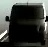

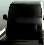

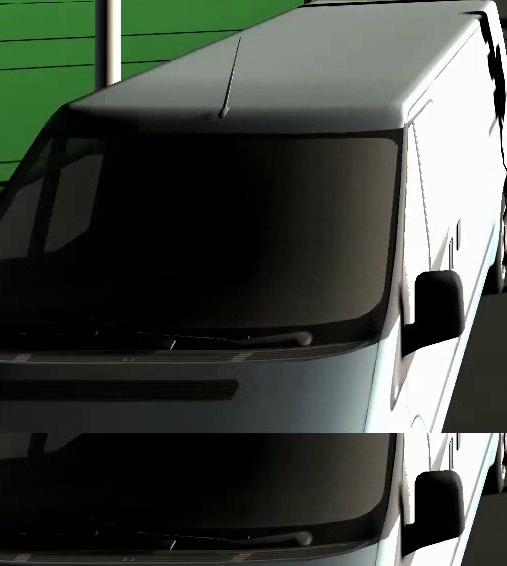

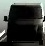

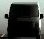

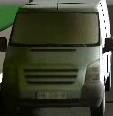

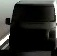

In [5]:
import glob
from IPython.display import Image, display
import random

images = []
for imageName in glob.glob('./vehicle-tracking/runs/track/exp/tracks/video-1-raw/*.jpg'):
    #display(Image(filename=imageName))
    images.append(imageName)

for _ in range(10):
    display(Image(filename = images[random.randint(0, len(images) - 1)]))